# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (1, 0)_, ground truth _(g1, g2) = (1, 1), h0 = 0, (wx, wh, b1, w, b2) = (1, 1, 1, 1, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

**Forward**
Evaluating the forward direction first, the equation for $h_1$ is given as $h_1 = \sigma(w_x x * x_1 + w_h * h_0 + b_1)$. When substituting in the corresponding values, this equation becomes $h_1 = \sigma(1*1+1*0+1) = \sigma(2) = .881$. Evaluating $y_1$, the equation is $y_1 = \sigma(w*h_1+b_2) = \sigma(1*.881+1) = .868$. For $h_2$ the equation is $h_2 = \sigma(w_x * x + w_h * h + b_1) = \sigma(1*0 + 1*.881 + 1) = \sigma(1.881) = .868$. For $y_2$ the equation is $y_2 = \sigma(w*h_2 + b_1) = \sigma(1*.868 + 1) = \sigma(1.868) = .866$

**Derivatives**
The derivatives were calculated outside of this script. For use in this derivation, the derivative of a sigmoid is $\sigma' = \sigma (1-\sigma)$. The loss of this function is $L = \frac{(g_1-y_1)^2+(g_2-y_2)^2}{2}$. The derivatives $dL$ are 
$\frac{dL}{dw_x} = (g_1-y_1)y_1(1-y_1)w*h_1(1-h_1)x_1 + (g_2-y_2)y_2(1-y_2)w*h_2(1-h_2)(x_2+w_h*h_1(1-h_1)x_1)$

$\frac{dL}{dw_h} = (g_1-y_1)y_1(1-y_1)w*h_1(1-h_1)h_0 + (g_2-y_2)y_2(1-y_2)w*h_2(1-h_2)(h_1+w_h*h_1(1-h_1)h_0)$

$\frac{dL}{dw} = (g_1-y_1)y_1(1-y_1)h_1+(g_2-y_2)y_2(1-y_2)h_2$

$\frac{dL}{db_2}=(g_1-y_1)y_1(1-y_1) + (g_2-y_2)y_2(1-y_2)$

$\frac{dL}{db_1}= (g_1-y_1)y_1(1-y_1)w*h_1(1-h_1) + (g_2-y_2)y_2(1-y_2)w*h_2(1-h_2)(1+w_h*h_1(1-h_1))$

By substituting in the values from above and the givens, these equations become
$\frac{dL}{dw_x} = (1-.868).868(1-.868)1*.881(1-.881)1 + (1-.866).866(1-.866)1*.868(1-.868)(0+1*.881(1-.881).881) = .00175$

$\frac{dL}{dw_h} = (1-.868).868(1-.868)1*.881(1-.881)0 + (1-.866).866(1-.866)1*.868(1-.868)(.881+1*.881(1-.881)*0) = .00157$

$\frac{dL}{dw} = (1-.868).868(1-.868)*.881+(1-.866).866(1-.866).868 = .0268$

$\frac{dL}{db_2} = (1-.868).868(1-.868)+(1-.866).866(1-.866) = .0307$

$\frac{dL}{db_1} = (1-.868).868(1-.868)1*.881(1-.881) + (1-.866).866(1-.866)1*.868(1-.868)(1+1*.881(1-.881)) = .00355$

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [2]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow GRUCell
This section shows an example how to build a RNN network using an GRU cell. GRU cell is an inbuilt class in tensorflow which implements the real behavior of the GRU neuron. 

Reference: 
1. [TensorFlow GRU cell](https://www.tensorflow.org/versions/r1.8/api_docs/python/tf/contrib/rnn/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

In [3]:
from tensorflow.contrib.rnn import GRUCell

In [4]:
tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# define GRU cell
num_units = 64
cell = GRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

print(hidden)
print(_)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

Tensor("rnn/transpose_1:0", shape=(?, ?, 64), dtype=float32)
Tensor("rnn/while/Exit_3:0", shape=(?, 64), dtype=float32)


### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

epoch 1 
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 


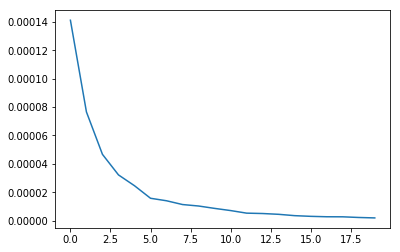

In [5]:
#cite: http://monik.in/a-noobs-guide-to-implementing-rnn-lstm-using-tensorflow/

X, y = create_dataset(30000)
n_train = 29000
X_train = X[:n_train]
y_train = y[:n_train]
X_val = X[n_train:]
y_val = y[n_train:]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 200
no_batches = int(len(X_train)/batch_size)
epoch = 20
no_val = int(len(X_val)/epoch)
L = np.empty(20)
for i in range(epoch):
    tot = 0
    for j in range(no_batches):
        inp, out = X_train[tot*batch_size:(tot+1)*batch_size], y_train[tot*batch_size:(tot+1)*batch_size]
        tot+=1
        sess.run(optimizer,{input_data: inp, output_data: out})
    L[i] = sess.run(loss,{input_data: X_val[i*no_val:(i+1)*no_val], output_data: y_val[i*no_val:(i+1)*no_val]})
    print("epoch {} ".format(i + 1))
sess.close()
plt.plot(L)

## Task 1, Part 3 :  Build your own GRUCell
In this part, you need to build your own GRU cell to achieve the GRU functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyGRUCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [6]:
from ecbm4040.xor.rnn import MyGRUCell

In [7]:
# recreate xor netowrk with your own GRU cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own GRU cell
num_units = 64
cell = MyGRUCell(num_units)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

epoch 1 
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 


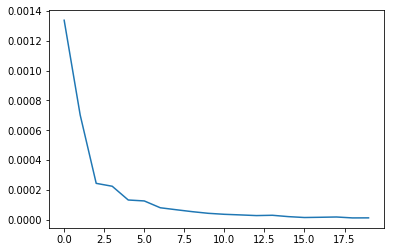

In [8]:
X, y = create_dataset(30000)
n_train = 29000
X_train = X[:n_train]
y_train = y[:n_train]
X_val = X[n_train:]
y_val = y[n_train:]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 200
no_batches = int(len(X_train)/batch_size)
epoch = 20
no_val = int(len(X_val)/epoch)
L = np.empty(20)
for i in range(epoch):
    tot = 0
    for j in range(no_batches):
        inp, out = X_train[tot*batch_size:(tot+1)*batch_size], y_train[tot*batch_size:(tot+1)*batch_size]
        tot+=1
        sess.run(optimizer,{input_data: inp, output_data: out})
    L[i] = sess.run(loss,{input_data: X_val[i*no_val:(i+1)*no_val], output_data: y_val[i*no_val:(i+1)*no_val]})
    print("epoch {} ".format(i + 1))
sess.close()
plt.plot(L)